In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

from scipy.stats import ttest_1samp

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'Ch_04.pdf',
 'Ch_06.pdf',
 'Ch_07.pdf',
 'Ch_08.pdf',
 'data',
 'datasets',
 'ex_ch3.pdf',
 'fetch_data.py',
 'first_time',
 'grant_submit.csv',
 'R_notebook.ipynb',
 'Untitled.ipynb',
 'X2008_y2008_Xpre2008_ypre2008_Xall_yall_Xval_yval_cv.pkl',
 'Xtest.pkl']

In [3]:
car2010 = pd.read_csv('data/FuelEconomy/cars2010.csv',  index_col=0)
car2011 = pd.read_csv('data/FuelEconomy/cars2011.csv', index_col=0)

In [4]:
car2010.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
1088,4.7,8,AM6,28.0198,NaturallyAspirated,6,1.0,0.0,TwoWheelDriveRear,2,2,2Seaters,1.0,0.0
1089,4.7,8,M6,25.6094,NaturallyAspirated,6,1.0,0.0,TwoWheelDriveRear,2,2,2Seaters,1.0,0.0
1090,4.2,8,M6,26.8000,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
1091,4.2,8,AM6,25.0451,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
1092,5.2,10,AM6,24.8000,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0


In [5]:
car2011.head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
1,5.9,12,M6,22.9258,NaturallyAspirated,6,0.0,0.0,TwoWheelDriveRear,2,2,2Seaters,0.0,0.0
8,4.2,8,AM6,26.7678,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
9,4.2,8,M6,24.3010,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
10,5.2,10,AM6,24.3325,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0
11,5.2,10,M6,23.0667,NaturallyAspirated,6,0.0,0.0,AllWheelDrive,2,2,2Seaters,1.0,0.0


In [6]:
car2010.tail()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
2191,3.2,6,S6,30.4926,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1.0,0.0
2192,3.0,6,S6,29.7892,Turbocharged,6,1.0,0.0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1.0,0.0
2193,3.2,6,S6,30.4926,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1.0,0.0
2194,3.2,6,S6,29.7431,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1.0,0.0
2195,4.4,8,S6,26.2000,NaturallyAspirated,6,1.0,0.0,AllWheelDrive,2,2,SpecialPurposeVehicleSUV4WD,1.0,0.0


In [7]:
car2010 = car2010[['EngDispl', 'FE']]
car2011 = car2011[['EngDispl', 'FE']]

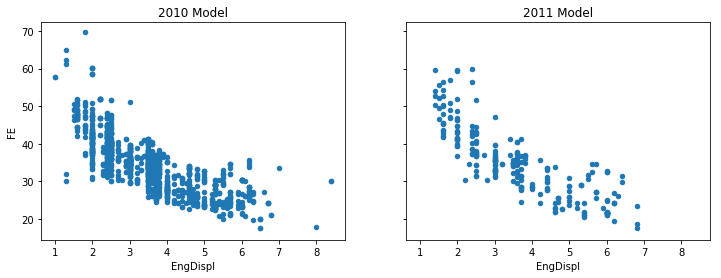

In [8]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True, sharex=True)
car2010.plot(kind='scatter', x='EngDispl', y='FE', title='2010 Model', ax=ax[0])
car2011.plot(kind='scatter', x='EngDispl', y='FE', title='2011 Model', ax=ax[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F7685C6A0>,
      dtype=object)

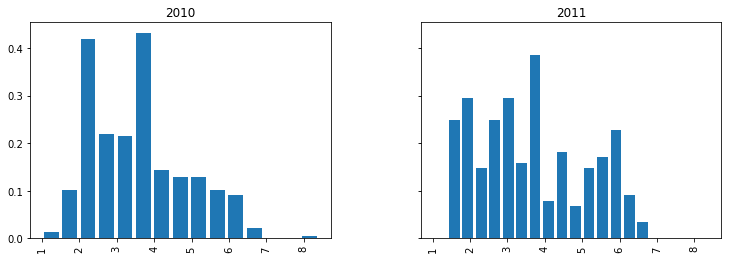

In [9]:
(pd.concat([car2010.assign(n='2010'), car2011.assign(n='2011')])
     .drop('FE', axis=1)
     .hist(by='n', sharex=True, sharey=True, density=True, 
           bins=15, rwidth=.8, figsize=(12, 4))
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021F7692AB00>,
      dtype=object)

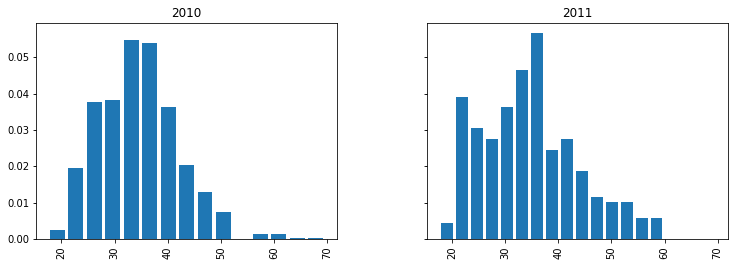

In [10]:
(pd.concat([car2010.assign(n='2010'), car2011.assign(n='2011')])
     .drop('EngDispl', axis=1)
     .hist(by='n', sharex=True, sharey=True, density=True, 
           bins=15, rwidth=.8, figsize=(12, 4))
)

In [11]:
car2010.shape, car2011.shape

((1107, 2), (245, 2))

In [14]:
X_train = car2010.drop('FE', axis=1).values
y_train = car2010['FE'].values

In [17]:
X_train_poly = (car2010
                    .assign(EngDispl_sqr=lambda x: x.EngDispl**2)
                    .drop('FE', axis=1)
                    .values
               )

In [43]:
lr = LinearRegression()

In [72]:
nmse = cross_val_score(LinearRegression(), X_train, y_train, cv=10, 
                         scoring='neg_mean_squared_error')
r2 = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='r2')
preds = cross_val_predict(LinearRegression(), X_train, y_train, cv=10)

In [74]:
lr.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_true=y_train, y_pred=lr.predict(X_train)))

4.620076226095307

In [75]:
lr.coef_, lr.intercept_

(array([-4.52092928]), 50.56322991169735)

In [76]:
xs = np.linspace(car2010.EngDispl.min(), car2010.EngDispl.max(), 100)

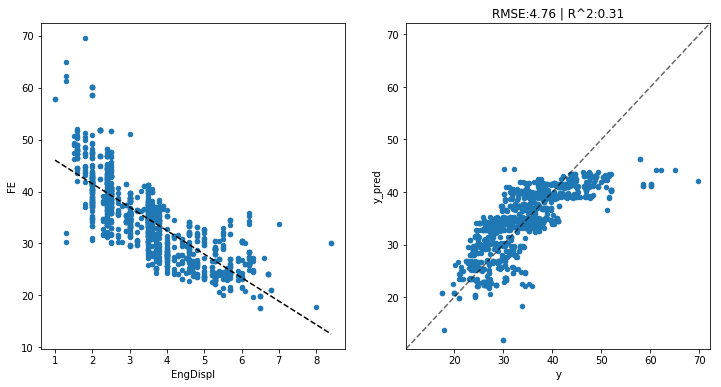

In [77]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Fitting Plot
(car2010
     .plot
     .scatter(x='EngDispl', y='FE', ax=axs[0])
)
ys = lr.predict(xs[:, None])
axs[0].plot(xs, ys, 'k--')

# Residual Plots
(pd.DataFrame(np.c_[y_train, preds], columns=['y', 'y_pred'])
          .plot
          .scatter(x='y', y='y_pred', ax=axs[1], 
                   title="RMSE:{:.2f} | R^2:{:.2f}".format(np.sqrt(-nmse.mean()), r2.mean()))
     )
xmin, xmax, ymin, ymax = axs[1].axis()
amin, amax = min(xmin, ymin), max(xmax, ymax)
axs[1].set_ylim(amin, amax)
axs[1].set_xlim(amin, amax)
axs[1].plot([amin, amax], [amin, amax], 'k--', alpha=.6)

In [69]:
nmse_poly = cross_val_score(LinearRegression(), X_train_poly, y_train, 
                              cv=10, scoring='neg_mean_squared_error')
r2_poly = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=10, scoring='r2')
preds_poly = cross_val_predict(LinearRegression(), X_train_poly, y_train, cv=10)

lr.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

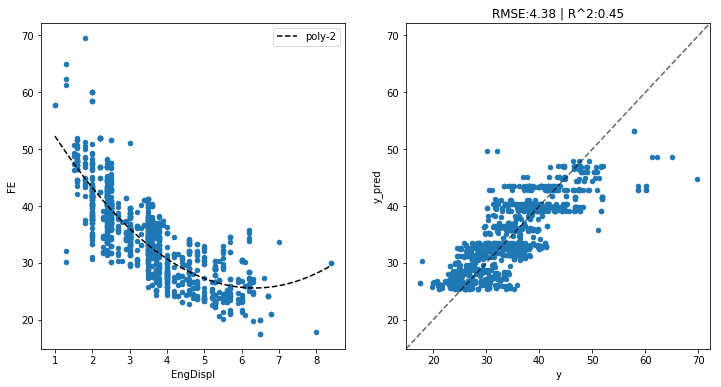

In [71]:
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))

# Fitting Plot
(car2010
     .plot
     .scatter(x='EngDispl', y='FE', ax=axs[0])
)
ys = lr.predict(np.c_[xs, xs**2])
axs[0].plot(xs, ys, 'k--', label='poly-2')
axs[0].legend()


(pd.DataFrame(np.c_[y_train, preds_poly], columns=['y', 'y_pred'])
          .plot
          .scatter(x='y', y='y_pred', ax=axs[1], 
                   title="RMSE:{:.2f} | R^2:{:.2f}".format(np.sqrt(-nmse_poly.mean()), np.mean(r2_poly)))
     )
xmin, xmax, ymin, ymax = axs[1].axis()
amin, amax = min(xmin, ymin), max(xmax, ymax)
axs[1].set_ylim(amin, amax)
axs[1].set_xlim(amin, amax)
axs[1].plot([amin, amax], [amin, amax], 'k--', alpha=.6)

In [78]:
car2011.describe()

,EngDispl,FE
count,245.00000,245.000000
mean,3.63551,34.730664
std,1.47134,9.206441
min,1.40000,17.700000
25%,2.50000,28.100000
50%,3.50000,34.434100
75%,4.70000,40.300000
max,6.80000,59.900000


#### Check if Train & Test are from similar population

In [106]:
A = pd.concat([car2010.assign(t=1), car2011.assign(t=0)])

In [107]:
A = A.sample(len(A))

In [108]:
A.head()

,EngDispl,FE,t
2070,3.5,34.6000,1
334,3.0,35.8000,0
656,5.0,28.7160,0
1156,5.9,27.2408,1
1701,1.6,44.2000,1


In [109]:
X, y = A.drop('t', axis=1).values, A['t'].values

In [110]:
acc = cross_val_score(LogisticRegression(class_weight='balanced'), X, y, cv=10, scoring='accuracy')
acc

array([0.52941176, 0.60294118, 0.58088235, 0.51470588, 0.47794118,
       0.61481481, 0.58518519, 0.57462687, 0.57462687, 0.58955224])

In [111]:
acc.mean()

0.564468832309043

In [112]:
# H0: acc=0.5, Ha: acc!=0.5
# if H0 is true, it means that there is no evidence that train & test are really different
ttest_1samp(acc, 0.5)

Ttest_1sampResult(statistic=4.726894507605865, pvalue=0.0010785907277728012)